In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# X, y, w = make_regression(n_samples, n_features, bias, noise, random_state, coef=True)

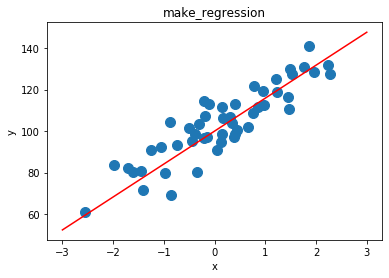

In [4]:
from sklearn.datasets import make_regression

X, y, w = make_regression(n_samples=50, n_features=1, bias=100, noise=10,
                         coef=True, random_state=0)


xx = np.linspace(-3,3,100)
y0 = w * xx + 100

plt.plot(xx,y0,'r-')
plt.scatter(X,y,s=100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('make_regression')
plt.show()

In [5]:
def make_regression2(n_samples, bias, noise, random_state=0):
    np.random.seed(random_state)
    X = np.random.normal(size=n_samples)
    w = 100 * np.random.normal(size=1)[0]
    y_0 = X * w + bias

    e = np.random.normal(scale=noise, size=n_samples)

    y = y_0 + e

    return X, y, w

In [6]:
X,y,w = make_regression2(50,100,10)

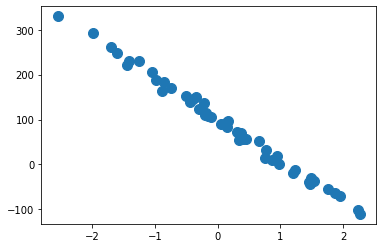

In [7]:
plt.scatter(X,y,s=100)
plt.show()

In [8]:
X0 = np.arange(10).reshape(5, 2)
X0

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [9]:
import statsmodels.api as sm

X = sm.add_constant(X0)
X

array([[1., 0., 1.],
       [1., 2., 3.],
       [1., 4., 5.],
       [1., 6., 7.],
       [1., 8., 9.]])

In [10]:
from sklearn.datasets import make_regression

bias = 100
X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [11]:
w

array(86.44794301)

In [12]:
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([[99.79150869],
       [86.96171201]])

C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49437 missing from c

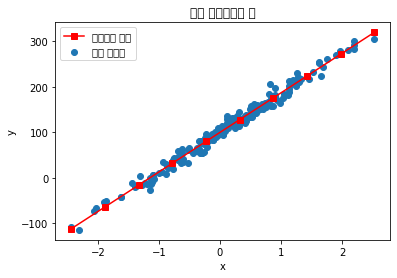

In [13]:
x_new = np.linspace(np.min(X0), np.max(X0), 10)
X_new = sm.add_constant(x_new)  # 상수항 결합
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="원래 데이터")
plt.plot(x_new, y_new, 'rs-', label="회귀분석 예측")
plt.xlabel("x")
plt.ylabel("y")
plt.title("선형 회귀분석의 예")
plt.legend()
plt.show()

In [14]:
import pandas as pd

In [15]:
df = pd.DataFrame({'x':X0[:,0], 'y': y[:,0]})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


In [16]:
import statsmodels.api as sm
dfy = df[["y"]]
dfX = sm.add_constant(df[["x"]])
model = sm.OLS(dfy, dfX)
result = model.fit()

C:\Users\82109\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [17]:
model = sm.OLS.from_formula("y ~ x", data=df)
result = model.fit()

In [18]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Thu, 14 May 2020   Prob (F-statistic):          8.17e-182
Time:                        00:05:25   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.0

In [19]:
result.predict({'x': [-2,-1,0,1,2]})

0    -74.131915
1     12.829797
2     99.791509
3    186.753221
4    273.714933
dtype: float64

In [20]:
result.params

Intercept    99.791509
x            86.961712
dtype: float64

C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51092 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48264 missing from c

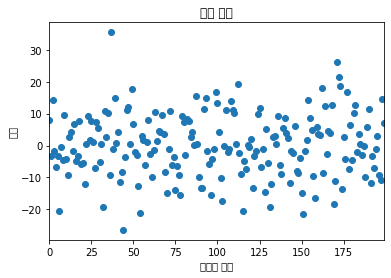

In [21]:
result.resid.plot(style='o')
plt.title('잔차 벡터')
plt.xlabel('데이터 번호')
plt.ylabel('잔차')
plt.show()

In [22]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)

dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=['MEDV'])

model_boston2 = sm.OLS(dfy,dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 14 May 2020   Prob (F-statistic):          6.72e-135
Time:                        00:05:25   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [25]:
df.head(5)

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119


In [26]:
diabetes

NameError: name 'diabetes' is not defined

In [27]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()


diabetes["target"] = diabetes.target
df["target"] = diabetes.target
df.tail()

dfX = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
dfy = pd.DataFrame(diabetes,target,columns=['MEDV'])
df= pd.concat([dfX,dfy],axis=1)

model1= sm.OLS.from_formula('MEDV ~ ' + '+'.join(diabetes.feature_names),data=df)
result1 = model1.fit()
print(result1.summary())

ValueError: Length of values does not match length of index

In [28]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

model1 = sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data=df)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 14 May 2020   Prob (F-statistic):          6.72e-135
Time:                        00:05:32   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [29]:
dfX.describe().loc['std']

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
Name: std, dtype: float64

In [30]:
################################################################

# 복습용

##### 2.1 데이터 전처리 기초

- missingno 패키지 : 결측 데이터 검색 (NaN이여야 하고, 데이터프레임상태여야함)
- sklearn.impute 패키지 : 결측 데이터 대체
- patsy 패키지 : 데이터 선택,변환,추가 ,스케일링
- sklearn.preprocessing 패키지 ; 스케일링 , 변환


In [31]:
from io import StringIO

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,'1',2019-01-01,A
2,,,2019-01-02,B
3,,'3',2019-01-03,C
,0.4,'4',2019-01-04,A
5,0.5,'5',2019-01-05,B
,,,2019-01-06,C
7,0.7,'7',,A
8,0.8,'8',2019-01-08,B
9,0.9,,2019-01-09,C
""")

In [32]:
df = pd.read_csv(csv_data, dtype={'x1': pd.Int64Dtype()}, parse_dates=[3])
df

,x1,x2,x3,x4,x5
0,1,0.1,'1',2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,'3',2019-01-03,C
3,NaN,0.4,'4',2019-01-04,A
4,5,0.5,'5',2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7,0.7,'7',NaT,A
7,8,0.8,'8',2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [33]:
df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


In [34]:
import missingno as msno
msno.bar(titanic)
plt.show()

NameError: name 'titanic' is not defined

In [35]:
df.dropna(thresh=7, axis=1) # 데이터가 7개 이상 있으면 남겨라

,x1,x4,x5
0,1,2019-01-01,A
1,2,2019-01-02,B
2,3,2019-01-03,C
3,NaN,2019-01-04,A
4,5,2019-01-05,B
5,NaN,2019-01-06,C
6,7,NaT,A
7,8,2019-01-08,B
8,9,2019-01-09,C


In [36]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


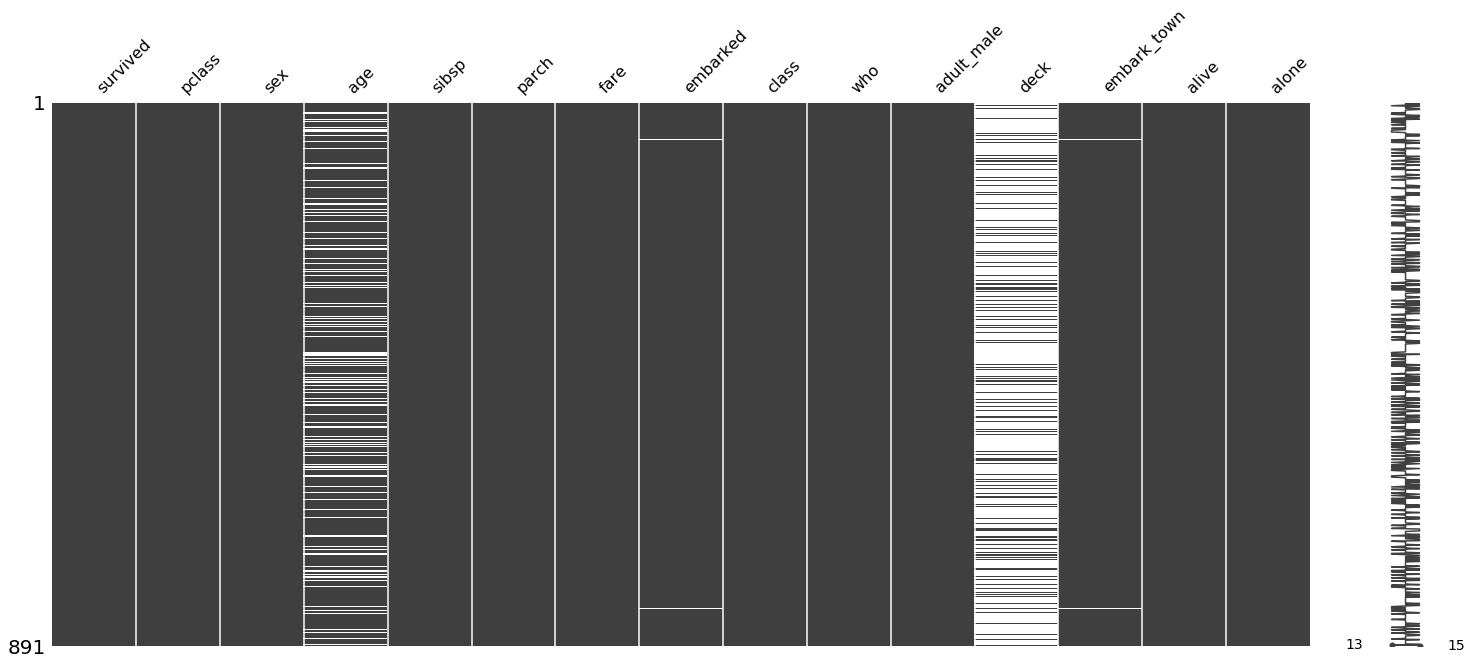

In [37]:
msno.matrix(titanic)
plt.show()

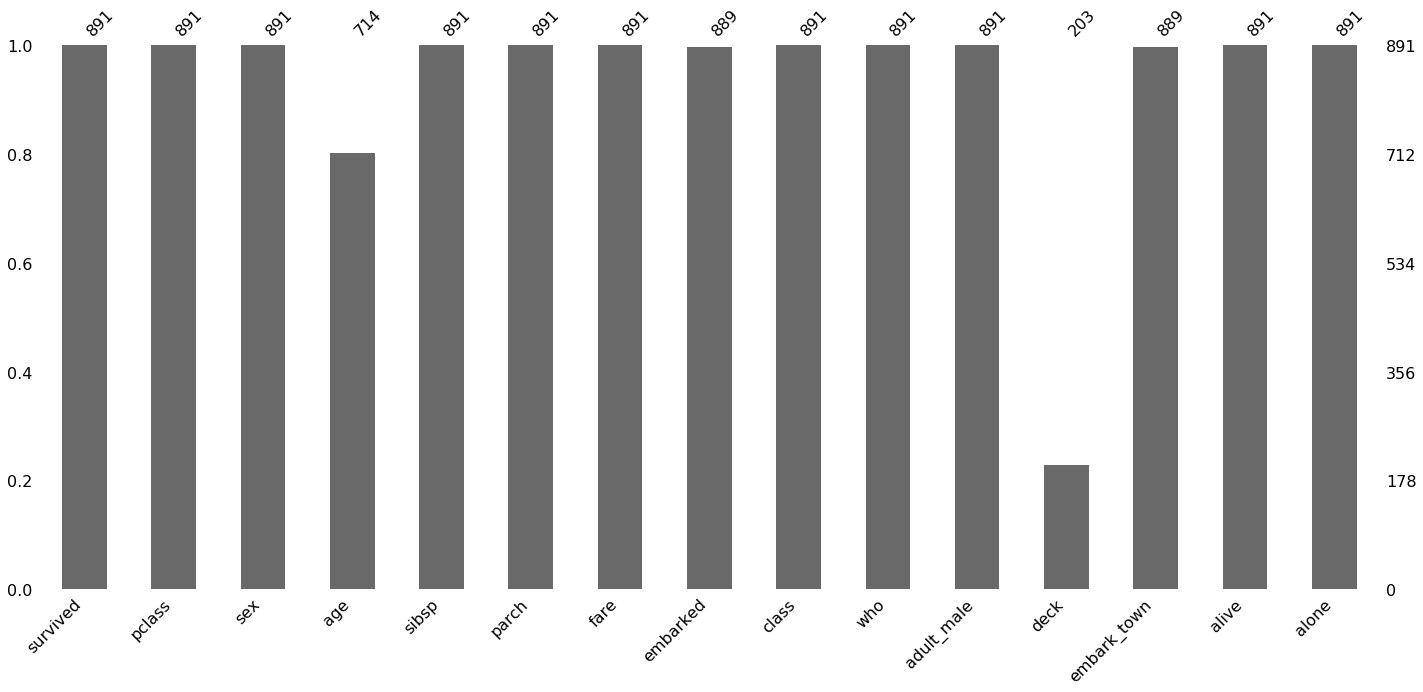

In [38]:
msno.bar(titanic)
plt.show()

In [39]:
df.dropna()

,x1,x2,x3,x4,x5
0,1,0.1,'1',2019-01-01,A
4,5,0.5,'5',2019-01-05,B
7,8,0.8,'8',2019-01-08,B


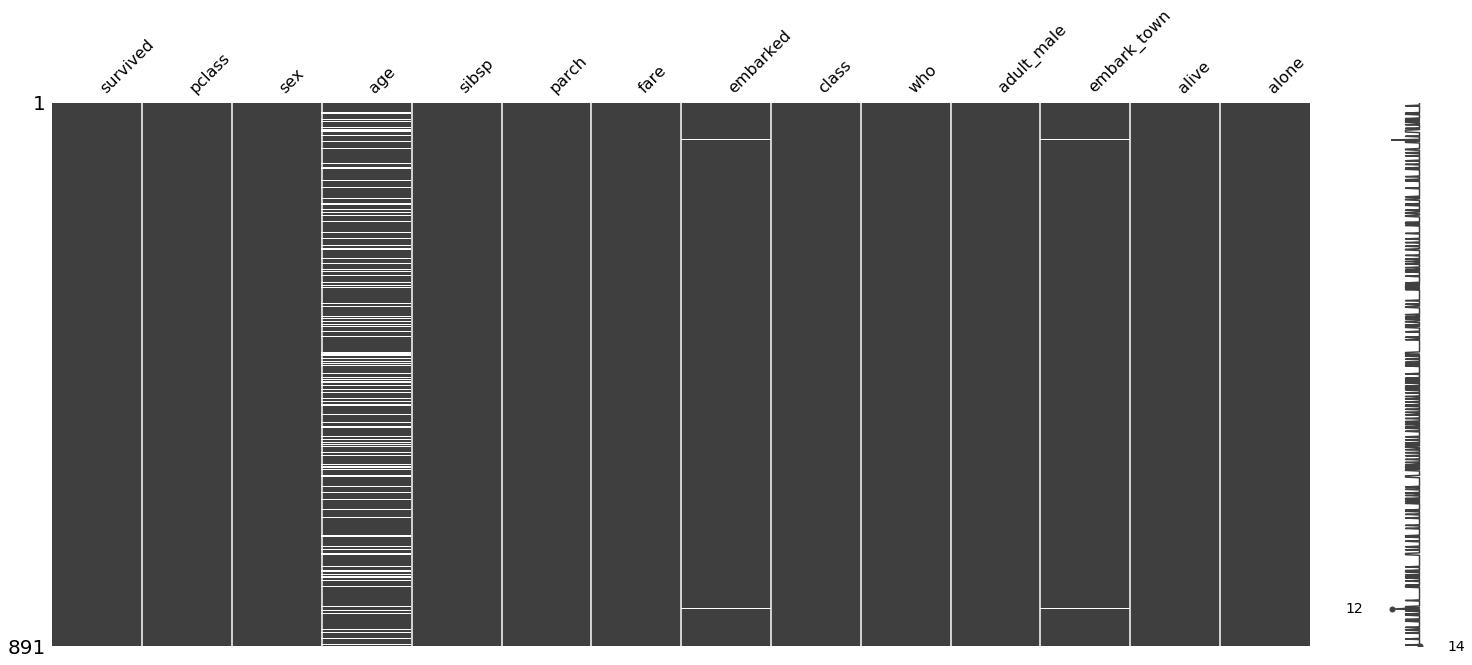

In [40]:
titanic = titanic.dropna(thresh=int(len(titanic) * 0.5), axis=1)
msno.matrix(titanic)
plt.show()

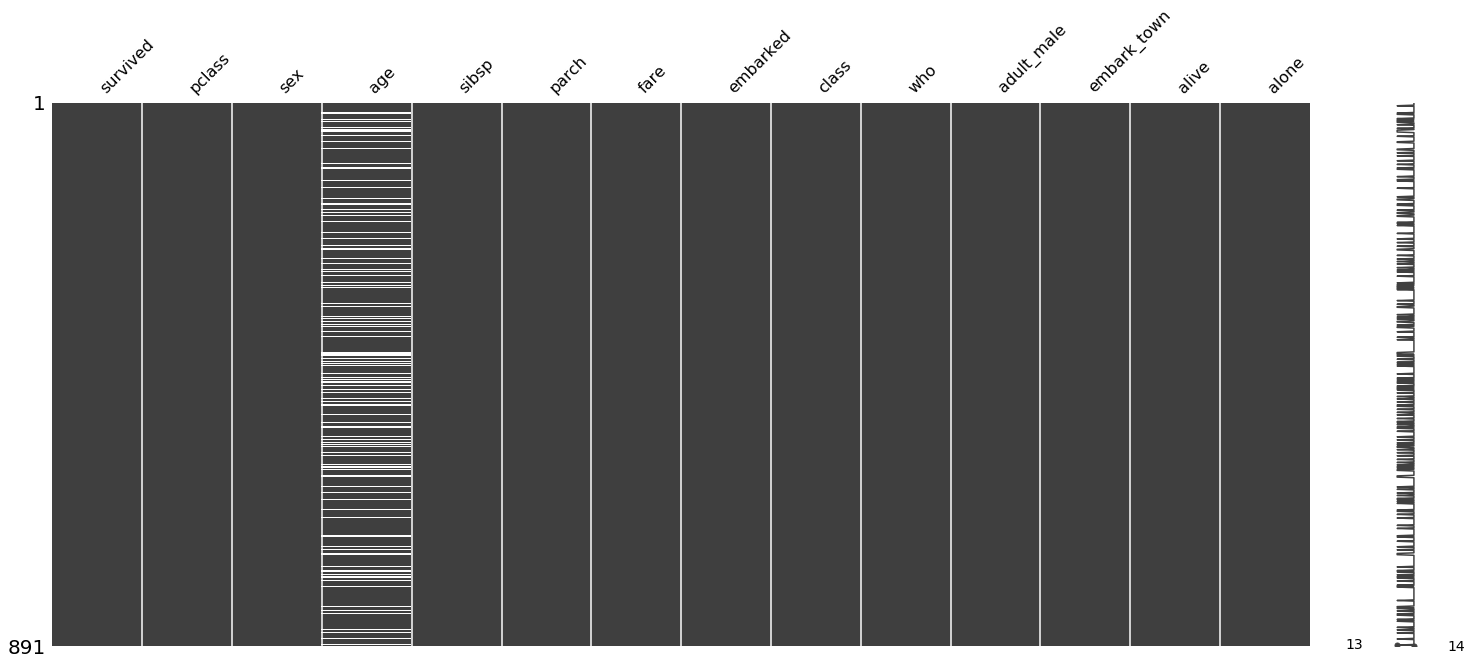

In [41]:
from sklearn.impute import SimpleImputer

imputer_embark_town = SimpleImputer(strategy='most_frequent')
titanic['embark_town'] = imputer_embark_town.fit_transform(titanic[['embark_town']])
titanic['embarked'] = imputer_embark_town.fit_transform(titanic[['embarked']])

msno.matrix(titanic)
plt.show()

In [42]:
from patsy import demo_data

df = pd.DataFrame(demo_data('x1','x2','x3','x4','x5'))
df

,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


In [43]:
from patsy import dmatrix

In [44]:
dmatrix('x1 + 0', data=df)

DesignMatrix with shape (5, 1)
       x1
  1.76405
  0.40016
  0.97874
  2.24089
  1.86756
  Terms:
    'x1' (column 0)

In [45]:
dmatrix('x1+x2+x3',data=df)

DesignMatrix with shape (5, 4)
  Intercept       x1        x2       x3
          1  1.76405  -0.97728  0.14404
          1  0.40016   0.95009  1.45427
          1  0.97874  -0.15136  0.76104
          1  2.24089  -0.10322  0.12168
          1  1.86756   0.41060  0.44386
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x3' (column 3)

In [46]:
dmatrix('survived+pclass+age+0',data=titanic)

DesignMatrix with shape (714, 3)
  survived  pclass  age
         0       3   22
         1       1   38
         1       3   26
         1       1   35
         0       3   35
         0       1   54
         0       3    2
         1       3   27
         1       2   14
         1       3    4
         1       1   58
         0       3   20
         0       3   39
         0       3   14
         1       2   55
         0       3    2
         0       3   31
         0       2   35
         1       2   34
         1       3   15
         1       1   28
         0       3    8
         1       3   38
         0       1   19
         0       1   40
         0       2   66
         0       1   28
         0       1   42
         0       3   21
         0       3   18
  [684 rows omitted]
  Terms:
    'survived' (column 0)
    'pclass' (column 1)
    'age' (column 2)
  (to view full data, use np.asarray(this_obj))

In [47]:
dmatrix('x1 + np.log(np.abs(x2))',df)

DesignMatrix with shape (5, 3)
  Intercept       x1  np.log(np.abs(x2))
          1  1.76405            -0.02298
          1  0.40016            -0.05120
          1  0.97874            -1.88811
          1  2.24089            -2.27090
          1  1.86756            -0.89014
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'np.log(np.abs(x2))' (column 2)

In [48]:
dmatrix('x1 * x2 + 0',df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

In [49]:
dmatrix('x1 + x2 + I(x1 + x2) + 0',df)

DesignMatrix with shape (5, 3)
       x1        x2  I(x1 + x2)
  1.76405  -0.97728     0.78677
  0.40016   0.95009     1.35025
  0.97874  -0.15136     0.82738
  2.24089  -0.10322     2.13767
  1.86756   0.41060     2.27816
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'I(x1 + x2)' (column 2)

In [50]:
dm = dmatrix('center(x1) + 0',df)
dm

DesignMatrix with shape (5, 1)
  center(x1)
     0.31377
    -1.05012
    -0.47154
     0.79061
     0.41728
  Terms:
    'center(x1)' (column 0)

In [51]:
dm.design_info.factor_infos

{EvalFactor('center(x1)'): FactorInfo(factor=EvalFactor('center(x1)'),
            type='numerical',
            state=<factor state>,
            num_columns=1)}

In [52]:
X = 90 * np.arange(9).reshape(-1, 1) 
X

array([[  0],
       [ 90],
       [180],
       [270],
       [360],
       [450],
       [540],
       [630],
       [720]])

C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54632 missing from c

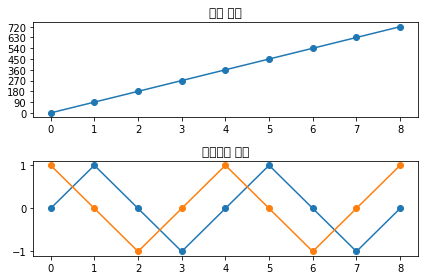

In [53]:
from sklearn.preprocessing import FunctionTransformer

def degree2sincos(X):
    x0 = np.sin(X * np.pi / 180)
    x1 = np.cos(X * np.pi / 180)
    X_new = np.hstack([x0, x1])
    return X_new

X2 = FunctionTransformer(degree2sincos).fit_transform(X)

plt.subplot(211)
plt.plot(X, marker="o")
plt.yticks(X.flatten())
plt.title("각도 표현")
plt.subplot(212)
plt.plot(X2, marker="o")
plt.title("삼각함수 표현")
plt.tight_layout()
plt.show()

In [54]:
from sklearn.datasets import load_boston

boston = load_boston()

dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [55]:
# 독립변수 행렬을 dfx 

#종속변수 벡터를 dfy

dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=['MEDV'])

In [56]:
df = pd.concat([dfX, dfy], axis=1)

df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


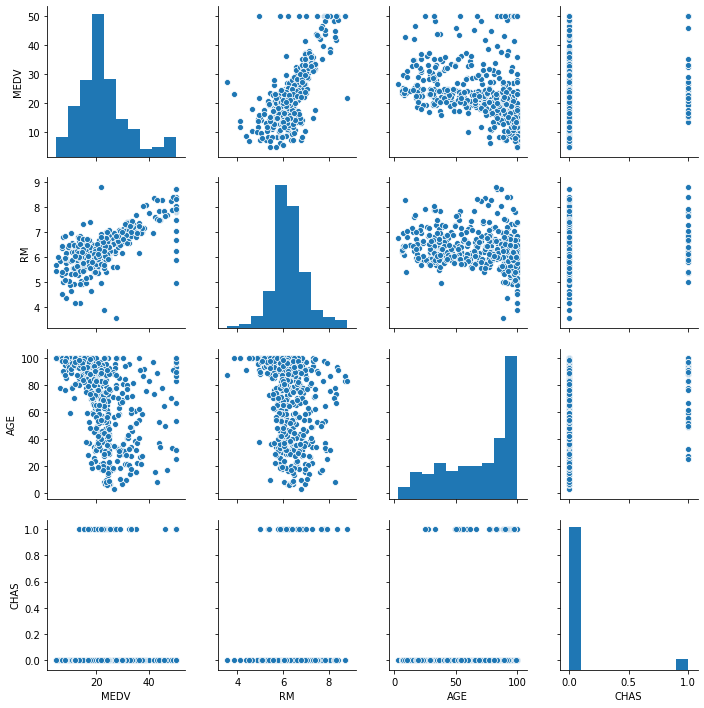

In [57]:
sns.pairplot(df[['MEDV','RM','AGE','CHAS']])
plt.show()

In [58]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

df['target'] = diabetes.target

df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


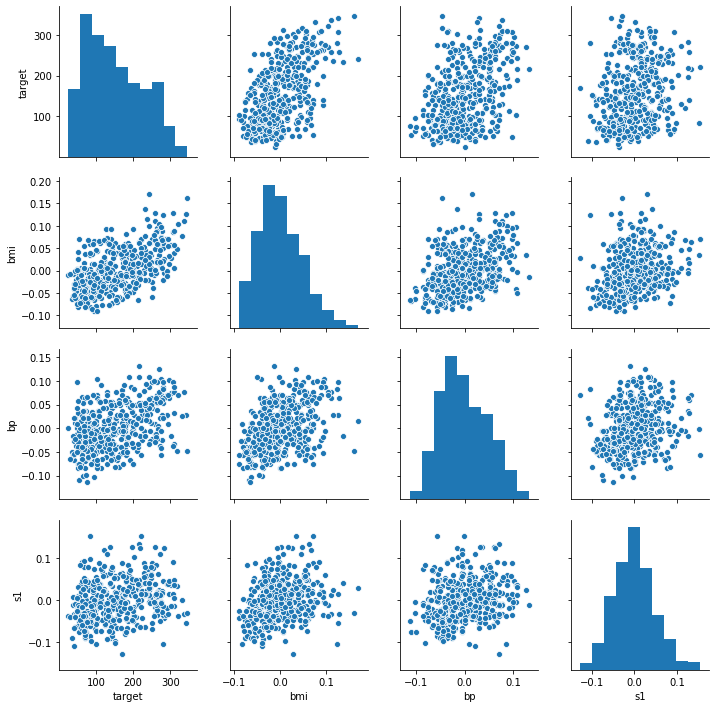

In [59]:
sns.pairplot(df[['target','bmi','bp','s1']])
plt.show()

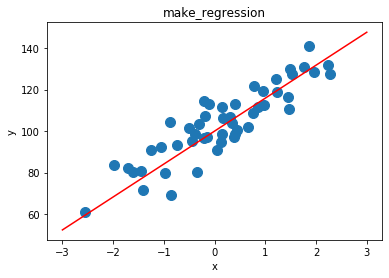

In [60]:
from sklearn.datasets import make_regression

X,y,w = make_regression(n_samples=50, n_features=1, bias=100, noise=10,coef=True,random_state=0)


xx= np.linspace(-3,3,100)

y0 = w * xx + 100

plt.plot(xx,y0,'r-')
plt.scatter(X,y,s=100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('make_regression')
plt.show()

In [61]:
def make_regression2(n_samples,bias,noise,random_state=0):
    np.random.seed(random_state)
    X = np.random.sample(n_samples)
    w = -20000* np.random.normal()
    
    y_0 = X*w+bias
    
    e = np.random.normal(scale=noise,size=n_samples)
    
    y = y_0 + e
    
    return X,y,w

In [62]:
X,y,w = make_regression2(50,100,10)

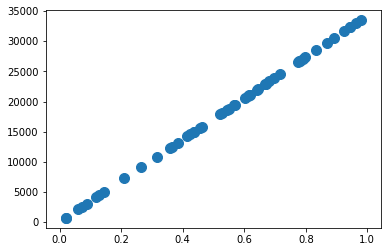

In [63]:
plt.scatter(X,y,s=100)
plt.show()


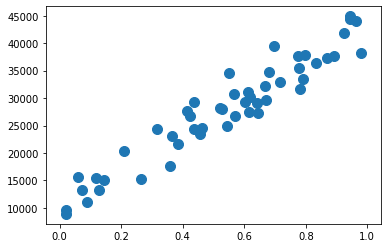

In [64]:
X,y,w = make_regression2(50,10000,3000)
plt.scatter(X,y,s=100)
plt.show()

In [65]:
df = pd.DataFrame({'x':X0[:,0],'y':y[:,0]})
df

IndexError: too many indices for array

In [ ]:
dfy = df[["y"]]
dfX = sm.add_constant(df[["x"]])
model = sm.OLS(dfy, dfX)
result = model.fit()

##### 

In [66]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 14 May 2020   Prob (F-statistic):          6.72e-135
Time:                        00:05:49   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

C:\Users\82109\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [67]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20,
                              coef=True, random_state=0)
coef

array(42.38550486)

In [68]:
dfX0 = pd.DataFrame(X0, columns=["X1"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["y"])

model = sm.OLS(dfy, dfX)
result = model.fit()


In [69]:
result.params

const    -1.628364
X1       42.853356
dtype: float64

In [70]:
%%time
N = 1000
params_w0 = np.zeros(N)
params_w1 = np.zeros(N)
for i in range(N):
    idx = np.random.choice(len(dfy), len(dfy), replace=True)
    dfX2 = dfX.iloc[idx, :]
    dfy2 = dfy.iloc[idx]
    r = sm.OLS(dfy2, dfX2).fit()
    params_w0[i] = r.params.const
    params_w1[i] = r.params.X1

Wall time: 2.39 s


Font 'default' does not have a glyph for '\ucd94' [U+cd94], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc815' [U+c815], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uce58' [U+ce58], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ubd84' [U+bd84], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud3ec' [U+d3ec], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ucd94' [U+cd94], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc815' [U+c815], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uce58' [U+ce58], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ubd84' [U+bd84], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud3ec' [U+d3ec], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ucd94' [U+cd94], 

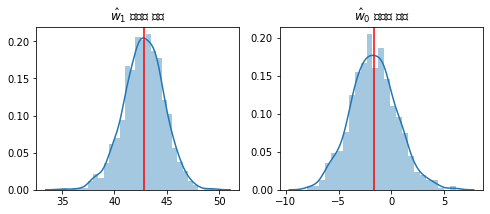

In [72]:
plt.figure(figsize=(8, 3))

ax1 = plt.subplot(121)
sns.distplot(params_w1, ax=ax1)
plt.axvline(params_w1.mean(), c='r')
plt.title("$\hat{w}_1$ 추정치 분포")

ax2 = plt.subplot(122)
sns.distplot(params_w0, ax=ax2)
plt.axvline(params_w0.mean(), c='r')
plt.title("$\hat{w}_0$ 추정치 분포")
plt.show()

In [73]:
params_w1.mean(), params_w1.std()

(42.77876773448511, 1.9318680459370952)

In [74]:
params_w0.mean(), params_w0.std()

(-1.684949588071454, 2.1981609168345977)

In [75]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Thu, 14 May 2020   Prob (F-statistic):           2.21e-36
Time:                        00:12:36   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4